### Importing Necessary Libraries

In this cell, we import all the necessary libraries for data manipulation, visualization, and preprocessing. The libraries include:

- `numpy`: For numerical operations.
- `pandas`: For data manipulation and analysis.
- `matplotlib.pyplot`: For data visualization.
- `datetime`: For handling date and time data.
- `MinMaxScaler`: From `sklearn.preprocessing`, used for normalizing the data.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr

### Data Loading and Initial Preprocessing
In this cell the following is done:
1. Load the dataset from an Excel file into a pandas DataFrame.
2. Convert the 'Sample Date-Time' column into a datetime object for easier manipulation.
3. Set the 'Sample Date-Time' column as the index for the DataFrame.
4. Drop unnecessary columns that won't be used in the analysis.


In [2]:
# Import the Excel data into a pandas DataFrame
BL_full = pd.read_excel(r'/Users/imemeulenbelt/Desktop/Data/Excel data/Gamma Spectrometry meeting.xlsx')

# Convert the 'Sample Date-Time' column to a datetime object
BL_full['Sample Date-Time'] = pd.to_datetime(BL_full['Sample Date-Time'])

# Set the 'Sample Date-Time' column as the index of the DataFrame
BL_full.set_index('Sample Date-Time', inplace=True)

# Drop some columns that aren't necessary
BL_full.drop(columns=['Detector used', 'Analysis Date-Time', 'Sample-Analysis time (hr aprox.)', 'Reactor start', 'Reactor stop'], inplace=True)


# Correlation

## Correlation Matrix

In [16]:
# Define the correlation matrix
corr_matrix = BL_full.corr(method='spearman')

## Heatmap Visualisation

In [17]:
# Set the size of each sub-plot
sub_size = 18

# Get the number of sub-plots in each direction
num_subplots_x = corr_matrix.shape[1] // sub_size + 1
num_subplots_y = corr_matrix.shape[0] // sub_size + 1

# Create a figure with a grid of sub-plots
fig, axes = plt.subplots(num_subplots_y, num_subplots_x, figsize=(20, 20))

# Save each sub-plot as a separate image file
# Loop over each sub-plot
for i in range(num_subplots_y):
    for j in range(num_subplots_x):
        # Clear the previous plot
        plt.clf()

        # Get the limits of the current sub-plot
        x_start = j * sub_size
        x_stop = min((j + 1) * sub_size, corr_matrix.shape[1])
        y_start = i * sub_size
        y_stop = min((i + 1) * sub_size, corr_matrix.shape[0])

        # Create a sub-correlation matrix
        sub_corr_matrix = corr_matrix.iloc[y_start:y_stop, x_start:x_stop]
        if sub_corr_matrix.empty:
            continue

        # Create a heatmap of the sub-correlation matrix
        heatmap = sns.heatmap(sub_corr_matrix, annot=True, cmap='coolwarm')
        heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20, rotation=90)
        heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20, rotation=0)  # Set rotation to 0


        # Adjust the font size of the annotations
        for text in heatmap.texts:
            text.set_fontsize(12)

        # Save the sub-plot as an image file
        filename = f"spearman_{i}_{j}.png"
        plt.savefig(filename, dpi=100)


# Close the figure
plt.close(fig)


## p-value

In [19]:
# Load your data into a pandas DataFrame (replace 'filename.csv' with your actual filename)
data = BL_full

# Iterate over all pairs of columns in the DataFrame
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        # Check if the second column index is greater than the first column index
        if j > i:
            # Calculate the Spearman's rho value and p-value for this pair of columns
            rho, p = spearmanr(data[col1], data[col2])

            # Check if the p-value is less than 0.05 and rho is greater than 0.6
            if p < 0.05 and rho > 0.6:
                print(f"Spearman's rho value between {col1} and {col2}: {rho:.2f}")
                print(f"p-value: {p:.2g}. This is <0.05 thus significant on a 95% interval\n")


Spearman's rho value between Week and 24Na: 0.65
p-value: 1e-08. This is <0.05 thus significant on a 95% interval

Spearman's rho value between 41Ar and 54Mn: 0.62
p-value: 8.1e-08. This is <0.05 thus significant on a 95% interval

Spearman's rho value between 41Ar and 56Mn: 0.62
p-value: 8.6e-08. This is <0.05 thus significant on a 95% interval

Spearman's rho value between 41Ar and 133Xe: 0.67
p-value: 3e-09. This is <0.05 thus significant on a 95% interval

Spearman's rho value between 41Ar and 135Xe: 0.68
p-value: 8.6e-10. This is <0.05 thus significant on a 95% interval

Spearman's rho value between 51Cr and 110mAg: 0.72
p-value: 4.7e-11. This is <0.05 thus significant on a 95% interval

Spearman's rho value between 51Cr and 115mCd: 0.63
p-value: 4.1e-08. This is <0.05 thus significant on a 95% interval

Spearman's rho value between 60Co and 110mAg: 0.69
p-value: 5.7e-10. This is <0.05 thus significant on a 95% interval

Spearman's rho value between 92Sr and 132I: 0.69
p-value: 5.

# Normalisation
Here, we normalize the dataset to ensure that all numerical columns have values between 0 and 1. This is especially useful for algorithms that are sensitive to feature scales. The steps include:
1. Initializing the `MinMaxScaler`.
2. Selecting numeric columns from the DataFrame.
3. Applying the scaler to normalize the numeric columns.
4. Combining the normalized data with the 'Week' column to get the final normalized DataFrame.


In [20]:
# Normalize the data
scaler = MinMaxScaler()
numeric_columns = BL_full.select_dtypes(include=[np.number]).drop(columns='Week', errors='ignore')
normalized_BL_full = pd.DataFrame(scaler.fit_transform(numeric_columns), columns=numeric_columns.columns, index=numeric_columns.index)
normalized_BL_full = pd.concat([BL_full['Week'], normalized_BL_full], axis=1)


### Normalisation constants
This cell calculates the normalization constants for each numeric column. The scaler object, which is presumably a MinMaxScaler from scikit-learn, provides the minimum values (data_min_) and range values (data_range_) for each column. These values are stored in a dictionary called normalization_constants, where each key is a column name, and the associated value is another dictionary containing the 'min' and 'range' for that column.

In [21]:
min_values = scaler.data_min_
range_values = scaler.data_range_

# Store these values in a dictionary
normalization_constants = {column: {'min': min_value, 'range': range_value} 
                           for column, min_value, range_value in zip(numeric_columns.columns, min_values, range_values)}

def dict_to_latex_table(data):
    header = "\\begin{table}[h]\n\\centering\n\\begin{tabular}{|c|c|c|}\n\\hline\n"
    header += "Element & Min & Range \\\\\n\\hline\n"
    
    rows = []
    for key, values in data.items():
        row = f"{key} & {values['min']} & {values['range']} \\\\\n"
        rows.append(row)
    
    footer = "\\hline\n\\end{tabular}\n\\caption{Normalization Constants}\n\\label{tab:normalization_constants}\n\\end{table}"
    
    return header + ''.join(rows) + footer

latex_table = dict_to_latex_table(normalization_constants)
#print(latex_table)


## Bootstrap Confidence Intervals

Bootstrapping is a powerful statistical method used to estimate the distribution of a statistic (like the mean) by resampling the data with replacement. It's especially useful when the data doesn't follow a known distribution or when there's limited data. In this section, we'll use bootstrapping to calculate the 95% confidence intervals for our groups.




This cell performs bootstrap sampling to calculate the 99.9% confidence intervals for the mean values of different groups of isotopes over a span of 5 weeks (including downtime).

The groups dictionary defines the isotopes belonging to each group.
n_bootstrap specifies the number of bootstrap samples to be taken.
The bootstrap_means dictionary is initialized to store the bootstrap means for each group and week.
For each group and week, the mean of the isotopes is calculated. If there are no isotopes measured for a specific week, the mean is set to 0.
Bootstrap resampling is then performed, and the means of the bootstrap samples are stored.
After all bootstrap samples are taken, the 0.05th and 99.95th percentiles are calculated to determine the 95% confidence interval for each group and week.


In [32]:
import numpy as np

# Define the groups
groups = {
    'Volatile & Gaseous': ['85mKr', '87Kr', '88Kr', '133Xe', '135Xe', '91Sr', '91mY', '92Sr', '97Nb', '103Ru', '131I', '132I', '133I', '134I', '135I', '138Ba', '138Cs', '139Ce', '140Ba', '141Ce'],
    'Contaminant': ['122Sb', '124Sb', '239Np'],
    'Structural': ['24Na', '41Ar', '54Mn', '56Mn', '60Co', '99Mo', '99mTc', '109Cd', '115Cd', '115mIn'],
    'pH_Eh_related': ['51Cr', '110mAg', '188Re'],
    'Unknown or False positives': ['55Fe', '56Co', '56Ni', '93mNb','117mSn' '123I', '124I', '125I', '125mTe', '231Th']
}



# Number of bootstrap samples
n_bootstrap = 10000

# Initialize a dictionary to store bootstrap means for each group and week
bootstrap_means = {group: {week: [] for week in range(6)} for group in groups}

baseline_info = pd.DataFrame(columns=['Week'])


# Bootstrap sampling
for group_name, group_columns in groups.items():
    # Check if all columns exist in the DataFrame
    missing_columns = [col for col in group_columns if col not in normalized_BL_full.columns]
    
    if missing_columns:
        print(f"Warning: Columns {missing_columns} are missing from the DataFrame. Skipping processing for these columns.")
        # Remove missing columns from group_columns
        group_columns = [col for col in group_columns if col not in missing_columns]
    
    group_columns_with_week = ['Week'] + group_columns
    Group = normalized_BL_full[group_columns_with_week]

    
    for i in range(6):  # Assuming you have data for weeks 0 to 5 inclusive
        mask = Group['Week'] == i
        Group_week = Group[mask].copy()
        
        if Group_week.empty:
            continue
        
        n_isotopes_measured = Group_week[group_columns].gt(0).sum(axis=1)  # Count number of non-zero values for each week
        sum_column = np.where(n_isotopes_measured == 0, 0, Group_week[group_columns].sum(axis=1) / n_isotopes_measured)
        
        # Bootstrap resampling
        for _ in range(n_bootstrap):
            sample = np.random.choice(sum_column, size=len(sum_column), replace=True)
            bootstrap_means[group_name][i].append(sample.mean())

# Calculate the 2.5th and 97.5th percentiles for the 95% confidence interval
for group_name in groups:
    for i in range(6):
        lower_bound = np.percentile(bootstrap_means[group_name][i], 0.05)
        upper_bound = np.percentile(bootstrap_means[group_name][i], 99.95)

        mean_value = np.mean(bootstrap_means[group_name][i])  # Calculate the mean
        
        week_mask = baseline_info['Week'] == i
        if week_mask.any():
            baseline_info.loc[week_mask, f'LowerLimit_{group_name}'] = lower_bound
            baseline_info.loc[week_mask, f'UpperLimit_{group_name}'] = upper_bound
            baseline_info.loc[week_mask, f'Mean_{group_name}'] = mean_value  # Store the mean
        else:
            new_row = {
                'Week': i,
                f'LowerLimit_{group_name}': lower_bound,
                f'UpperLimit_{group_name}': upper_bound,
                f'Mean_{group_name}': mean_value  # Store the mean in the new row
            }
            baseline_info = baseline_info.append(new_row, ignore_index=True)



/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_77100/664915290.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baseline_info = baseline_info.append(new_row, ignore_index=True)
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_77100/664915290.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baseline_info = baseline_info.append(new_row, ignore_index=True)
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_77100/664915290.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  baseline_info = baseline_info.append(new_row, ignore_index=True)
/var/folders/zv/42kjntbn5cq7mb4xfbb4xcnc0000gn/T/ipykernel_77100/664915290.py:72: FutureWarning: The frame.append method is deprecated and will be removed

The bootstrap method has been applied to calculate the 99.9% confidence intervals for each group and week. By resampling our data 10,000 times with replacement, we've estimated the distribution of the mean for each group and week. The resulting confidence intervals provide a range in which we expect the true mean to lie with 99.9% confidence.


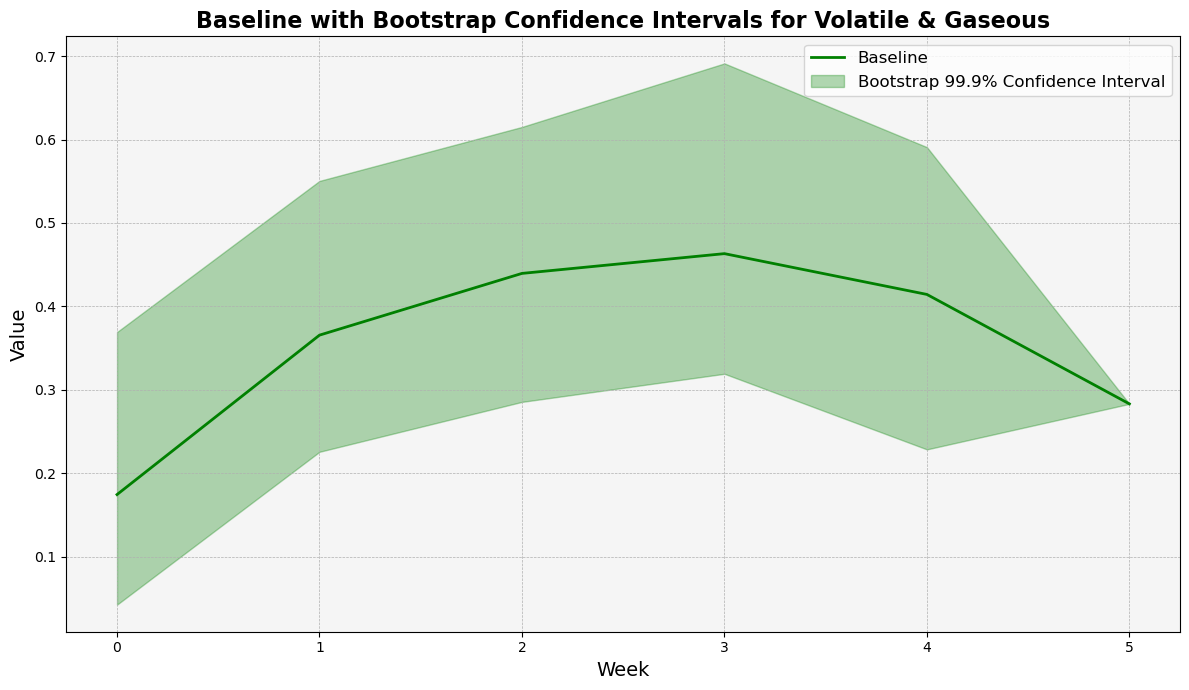

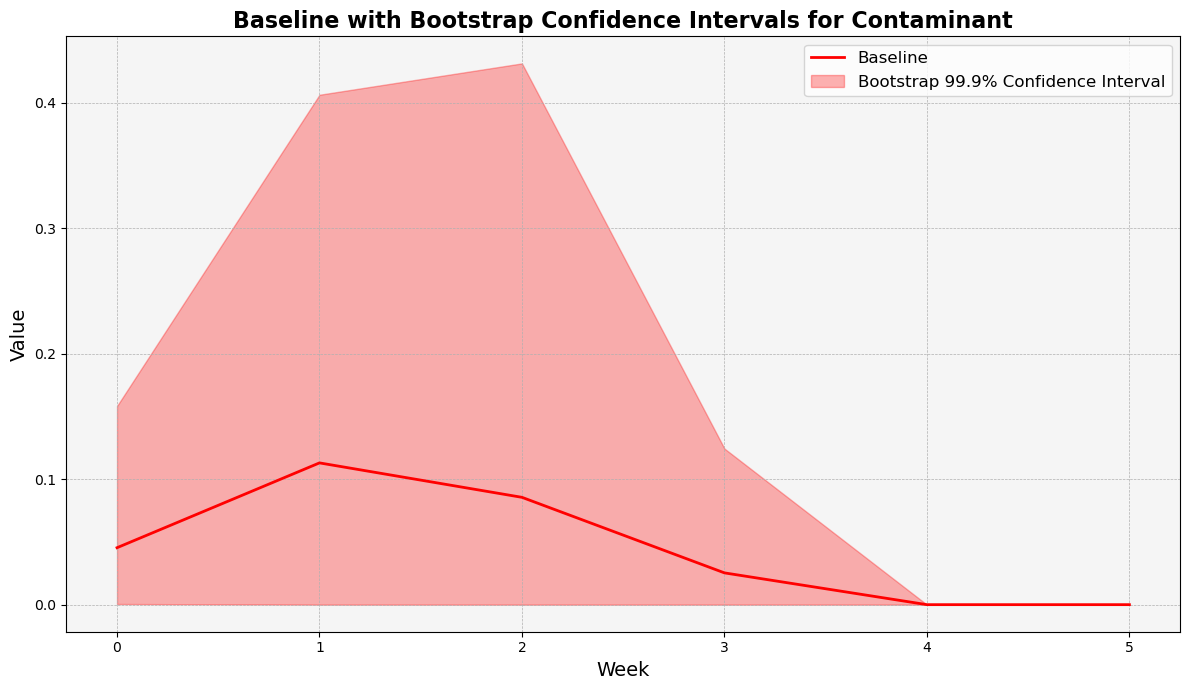

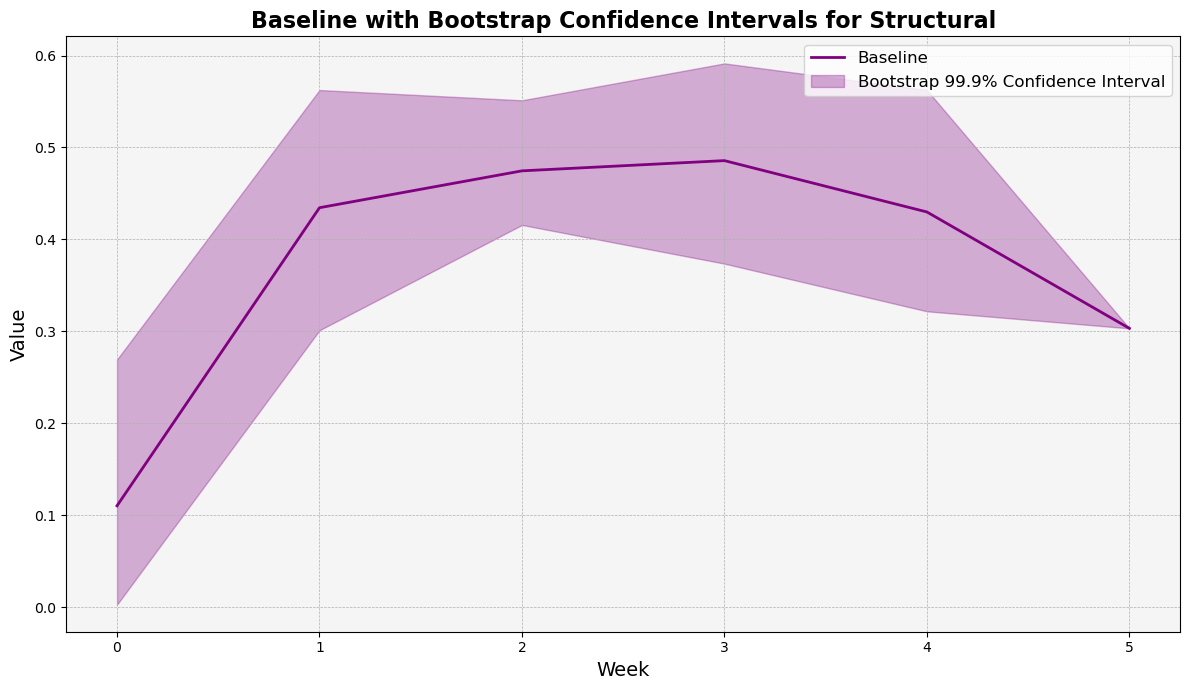

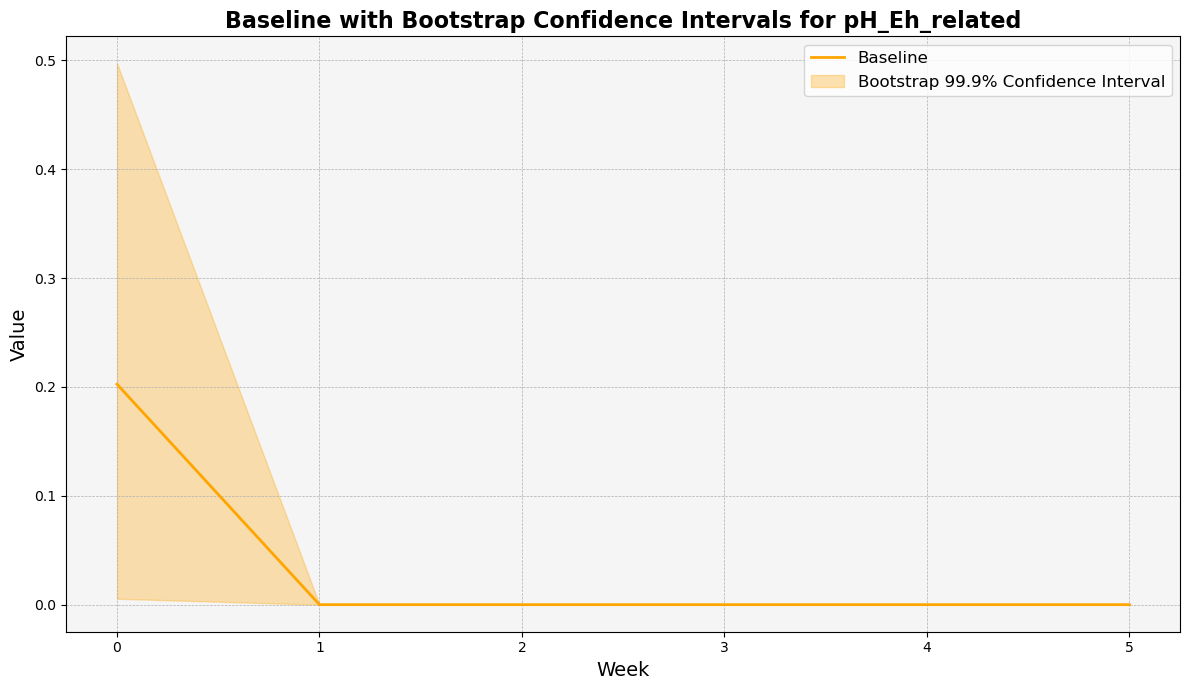

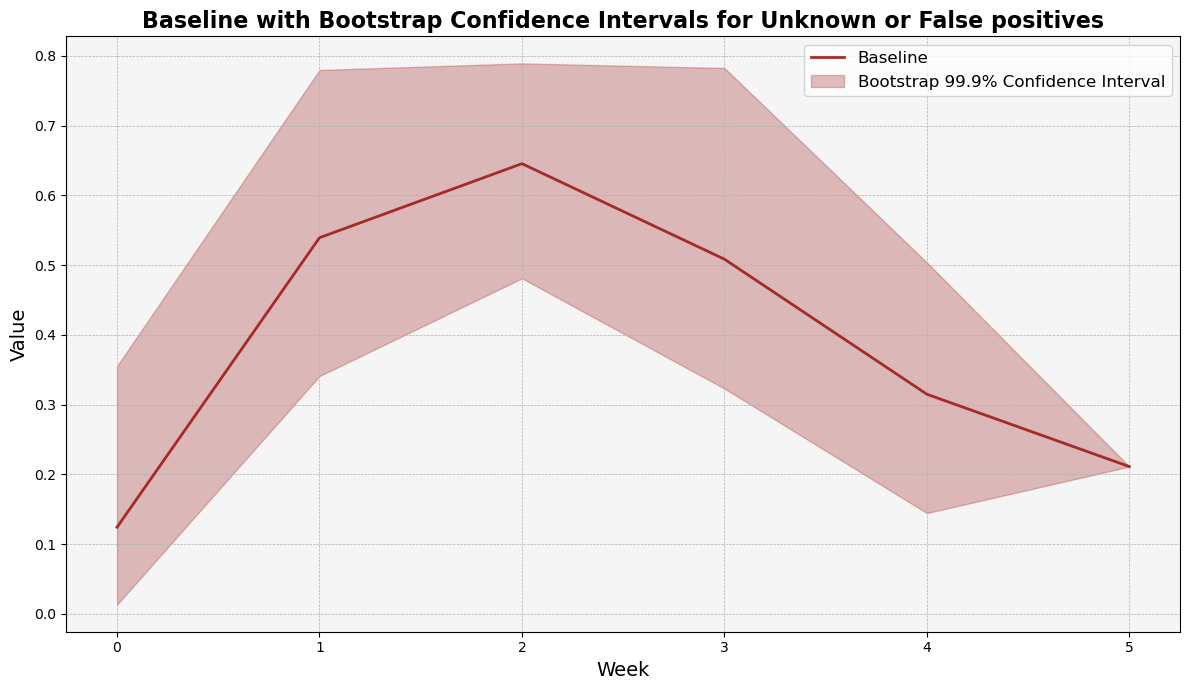

In [33]:
import matplotlib.pyplot as plt

# Define a colour palette
colour_palette = {
    'Volatile & Gaseous': 'green',
    'Contaminant': 'red',
    'Structural': 'purple',
    'pH_Eh_related': 'orange',
    'Unknown or False positives': 'brown'
}

# Visual Representation with Bootstrap Confidence Intervals
for group_name in groups:
    plt.figure(figsize=(12, 7))
    
    # Get the colour for the current group from the palette
    group_colour = colour_palette[group_name]
    
    # Plot the mean values
    plt.plot(baseline_info['Week'], baseline_info[f'Mean_{group_name}'], 
             label='Baseline', color=group_colour, linewidth=2, linestyle='-')
    
    # Fill the area for the 95% confidence interval with a lighter shade of the group colour
    plt.fill_between(baseline_info['Week'], 
                     baseline_info[f'LowerLimit_{group_name}'], 
                     baseline_info[f'UpperLimit_{group_name}'], 
                     color=plt.cm.colors.to_rgba(group_colour, alpha=0.3), 
                     label='Bootstrap 99.9% Confidence Interval')
    
    # Set the title and labels with enhanced font sizes
    plt.title(f'Baseline with Bootstrap Confidence Intervals for {group_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Week', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    
    # Display the legend
    plt.legend(fontsize=12)
    
    # Adjust the grid style
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Set the background colour for the plot for better contrast
    plt.gca().set_facecolor('whitesmoke')
    
    # Show the plot
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f'{group_name.replace(" ", "_").replace("&", "and")}_Bootstrap_Confidence_Intervals.png', format='png')
    
    plt.show()


### Conversion of DataFrame to Dictionary and String

This cell converts the baseline_info DataFrame into a dictionary format and subsequently into a string format.

First, the to_dict() method is used to convert the DataFrame into a dictionary, where each key represents a column name and the associated value is another dictionary containing the data for that column.
The dictionary is then converted into a string format using the str() function.
The resulting string is printed, allowing users to easily copy and utilize the string representation of the baseline information.

In [ ]:
# Convert the DataFrame to a dictionary
dict_baseline_info = baseline_info.to_dict()

# Convert the dictionary to a string
str_baseline_info = str(dict_baseline_info)

# Print the string so you can copy it
#print(str_baseline_info)
